#

In [ ]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [37]:
df = pd.read_csv('/workspaces/machine-learning/midterm/data/NY-House-Dataset.csv')

In [3]:
df.head()

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE
0,Brokered by Douglas Elliman -111 Fifth Ave,Condo for sale,315000,2,2.000000,1400.0,2 E 55th St Unit 803,"New York, NY 10022","2 E 55th St Unit 803New York, NY 10022",New York County,New York,Manhattan,East 55th Street,Regis Residence,"Regis Residence, 2 E 55th St #803, New York, N...",40.761255,-73.974483
1,Brokered by Serhant,Condo for sale,195000000,7,10.000000,17545.0,Central Park Tower Penthouse-217 W 57th New Yo...,"New York, NY 10019",Central Park Tower Penthouse-217 W 57th New Yo...,United States,New York,New York County,New York,West 57th Street,"217 W 57th St, New York, NY 10019, USA",40.766393,-73.980991
2,Brokered by Sowae Corp,House for sale,260000,4,2.000000,2015.0,620 Sinclair Ave,"Staten Island, NY 10312","620 Sinclair AveStaten Island, NY 10312",United States,New York,Richmond County,Staten Island,Sinclair Avenue,"620 Sinclair Ave, Staten Island, NY 10312, USA",40.541805,-74.196109
3,Brokered by COMPASS,Condo for sale,69000,3,1.000000,445.0,2 E 55th St Unit 908W33,"Manhattan, NY 10022","2 E 55th St Unit 908W33Manhattan, NY 10022",United States,New York,New York County,New York,East 55th Street,"2 E 55th St, New York, NY 10022, USA",40.761398,-73.974613
4,Brokered by Sotheby's International Realty - E...,Townhouse for sale,55000000,7,2.373861,14175.0,5 E 64th St,"New York, NY 10065","5 E 64th StNew York, NY 10065",United States,New York,New York County,New York,East 64th Street,"5 E 64th St, New York, NY 10065, USA",40.767224,-73.969856


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4801 entries, 0 to 4800
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   BROKERTITLE                  4801 non-null   object 
 1   TYPE                         4801 non-null   object 
 2   PRICE                        4801 non-null   int64  
 3   BEDS                         4801 non-null   int64  
 4   BATH                         4801 non-null   float64
 5   PROPERTYSQFT                 4801 non-null   float64
 6   ADDRESS                      4801 non-null   object 
 7   STATE                        4801 non-null   object 
 8   MAIN_ADDRESS                 4801 non-null   object 
 9   ADMINISTRATIVE_AREA_LEVEL_2  4801 non-null   object 
 10  LOCALITY                     4801 non-null   object 
 11  SUBLOCALITY                  4801 non-null   object 
 12  STREET_NAME                  4801 non-null   object 
 13  LONG_NAME         

In [6]:
df.duplicated().sum()

np.int64(214)

In [38]:
df.drop_duplicates(inplace=True)

In [8]:
df.duplicated().sum()

np.int64(0)

EDA

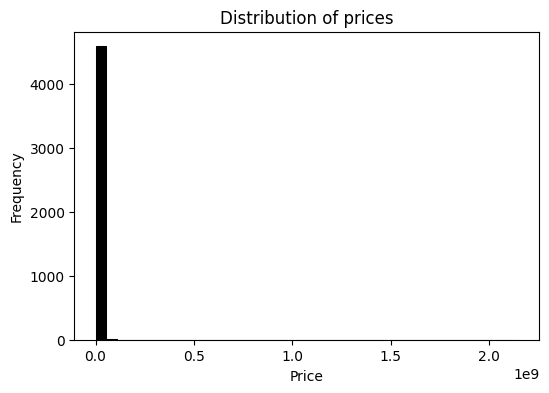

In [39]:
plt.figure(figsize=(6, 4))

sns.histplot(df['PRICE'], bins=40, color='black', alpha=1)
plt.ylabel('Frequency')
plt.xlabel('Price')
plt.title('Distribution of prices')

plt.show()

In [71]:
# use interquartile range to remove price outliers
upper_limit = df['PRICE'].quantile(0.94) # 6MM
lower_limit = df['PRICE'].quantile(0.02) # 170K
baths_limit = df['BATH'].quantile(0.99) # 8 BATHS
beds_limit = 10

In [72]:
outliers = df[(df['PRICE'] < lower_limit) | (df['PRICE'] > upper_limit) | (df['BATH'] > baths_limit) | (df['BEDS'] > beds_limit)]
# drop rows containing outliers
df_new = df.drop(outliers.index)

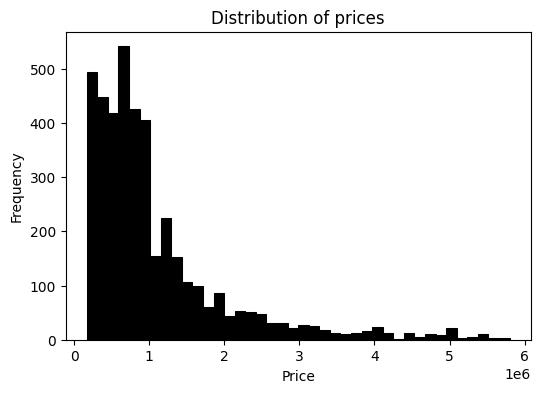

In [73]:
plt.figure(figsize=(6, 4))

sns.histplot(df_new['PRICE'], bins=40, color='black', alpha=1)
plt.ylabel('Frequency')
plt.xlabel('Price')
plt.title('Distribution of prices')

plt.show()

In [74]:
df_new.describe()

,PRICE,BEDS,BATH,PROPERTYSQFT,LATITUDE,LONGITUDE
count,4.144000e+03,4144.000000,4144.000000,4144.000000,4144.000000,4144.000000
mean,1.092656e+06,3.057191,2.122133,1893.488206,40.710474,-73.940234
std,9.652613e+05,1.714293,1.175586,1025.312882,0.088693,0.104153
min,1.699990e+05,1.000000,0.000000,246.000000,40.499546,-74.253033
25%,4.950000e+05,2.000000,1.000000,1163.750000,40.633913,-73.986228
50%,7.850000e+05,3.000000,2.000000,2184.207862,40.723361,-73.946325
75%,1.295000e+06,4.000000,2.373861,2184.207862,40.770249,-73.862881
max,5.799000e+06,10.000000,8.000000,21000.000000,40.912729,-73.702450


In [75]:
df_new['BEDS'].value_counts()

BEDS
3     1305
2      928
1      737
4      480
5      282
6      224
7       76
8       65
9       35
10      12
Name: count, dtype: int64

In [77]:
# Calculate skewness for each column
for column in df.select_dtypes(include=[np.number]).columns:
    skewness_per_column = df_new[column].skew()
    print(f"Skewness for {column}: {skewness_per_column}")

Skewness for PRICE: 2.1667822620576276
Skewness for BEDS: 1.1760618835597016
Skewness for BATH: 1.5369742023832909
Skewness for PROPERTYSQFT: 3.968623273362234
Skewness for LATITUDE: -0.046917732433040815
Skewness for LONGITUDE: -0.431698924351335


In [78]:
df['TYPE'].value_counts()

TYPE
Co-op for sale                1388
House for sale                 966
Condo for sale                 842
Multi-family home for sale     699
Townhouse for sale             288
Pending                        229
Contingent                      87
Land for sale                   47
For sale                        20
Foreclosure                     14
Condop for sale                  4
Coming Soon                      2
Mobile house for sale            1
Name: count, dtype: int64

In [79]:
df['STREET_NAME'].value_counts()

STREET_NAME
Manhattan          930
Brooklyn           696
Queens             655
Staten Island      461
The Bronx          294
                  ... 
2501                 1
67th Drive           1
Todt Hill            1
Saunders Street      1
Mount Eden           1
Name: count, Length: 174, dtype: int64

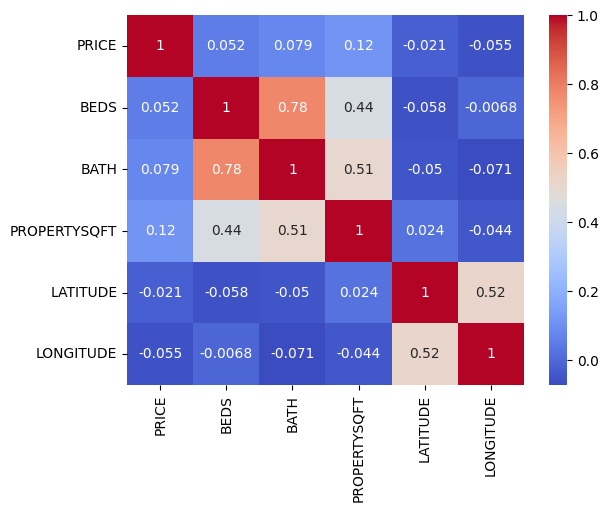

In [83]:
correlationn=pd.DataFrame()
for column in df.select_dtypes(include=[np.number]).columns:
    correlationn[column] = df[column]
relations=correlationn.corr()
sns.heatmap(relations, annot=True, cmap='coolwarm')
plt.show()


# EDA, feature importance analysis

# Model selection process and parameter tuning